In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score, roc_curve, 
                            roc_auc_score, 
                            make_scorer, plot_roc_curve)

In [121]:
mass = pd.read_csv('./data/mass_mobile.csv')

In [122]:
mass.head(2)

,Unnamed: 0,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,...,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration
0,0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,...,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.0,-0.8176,1
1,1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,...,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.0,0.0000,1


In [123]:
mass.drop(columns=['Unnamed: 0'], inplace=True)

In [124]:
# drop countries... too much noise
mass_no_country = mass.drop(columns=[ 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Czechoslovakia',
 'country_Denmark',
 'country_Djibouti',
 'country_Dominican Republic',
 'country_Ecuador',
 'country_Egypt',
 'country_El Salvador',
 'country_Equatorial Guinea',
 'country_Eritrea',
 'country_Estonia',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Gabon',
 'country_Gambia',
 'country_Georgia',
 'country_Germany',
 'country_Germany East',
 'country_Germany West',
 'country_Ghana',
 'country_Greece',
 'country_Guatemala',
 'country_Guinea',
 'country_Guinea-Bissau',
 'country_Guyana',
 'country_Haiti',
 'country_Honduras',
 'country_Hungary',
 'country_India',
 'country_Indonesia',
 'country_Iran',
 'country_Iraq',
 'country_Ireland',
 'country_Italy',
 'country_Ivory Coast',
 'country_Jamaica',
 'country_Japan',
 'country_Jordan',
 'country_Kazakhstan',
 'country_Kenya',
 'country_Kosovo',
 'country_Kuwait',
 'country_Kyrgyzstan',
 'country_Laos',
 'country_Latvia',
 'country_Lebanon',
 'country_Lesotho',
 'country_Liberia',
 'country_Libya',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Macedonia',
 'country_Madagascar',
 'country_Malawi',
 'country_Malaysia',
 'country_Mali',
 'country_Mauritania',
 'country_Mauritius',
 'country_Mexico',
 'country_Moldova',
 'country_Mongolia',
 'country_Montenegro',
 'country_Morocco',
 'country_Mozambique',
 'country_Myanmar',
 'country_Namibia',
 'country_Nepal',
 'country_Netherlands',
 'country_Nicaragua',
 'country_Niger',
 'country_Nigeria',
 'country_North Korea',
 'country_Norway',
 'country_Oman',
 'country_Pakistan',
 'country_Panama',
 'country_Papua New Guinea',
 'country_Paraguay',
 'country_Peru',
 'country_Philippines',
 'country_Poland',
 'country_Portugal',
 'country_Qatar',
 'country_Romania',
 'country_Russia',
 'country_Rwanda',
 'country_Saudi Arabia',
 'country_Senegal',
 'country_Serbia',
 'country_Serbia and Montenegro',
 'country_Sierra Leone',
 'country_Singapore',
 'country_Slovak Republic',
 'country_Slovenia',
 'country_Somalia',
 'country_South Africa',
 'country_South Korea',
 'country_South Sudan',
 'country_Spain',
 'country_Sri Lanka',
 'country_Sudan',
 'country_Suriname',
 'country_Swaziland',
 'country_Sweden',
 'country_Switzerland',
 'country_Syria',
 'country_Taiwan',
 'country_Tajikistan',
 'country_Tanzania',
 'country_Thailand',
 'country_Timor Leste',
 'country_Togo',
 'country_Tunisia',
 'country_Turkey',
 'country_Turkmenistan',
 'country_USSR',
 'country_Uganda',
 'country_Ukraine',
 'country_United Arab Emirate',
 'country_United Kingdom',
 'country_Uruguay',
 'country_Uzbekistan',
 'country_Venezuela',
 'country_Vietnam',
 'country_Yemen',
 'country_Yugoslavia',
 'country_Zambia',
 'country_Zimbabwe' ])

In [125]:
# all columns for easy copy and paste 
sorted(list(mass_no_country.columns))

['accomodation',
 'arrests',
 'beatings',
 'ccode',
 'compound',
 'country',
 'crowddispersal',
 'end_date',
 'id',
 'ignore',
 'killings',
 'labor_wage_dispute',
 'land_farm_issue',
 'location',
 'neg',
 'neu',
 'notes',
 'notes_clean',
 'partipants_number',
 'police_brutality',
 'political_behavior_process',
 'pop_density',
 'pop_female',
 'pop_male',
 'pop_total',
 'pos',
 'price increases_tax_policy',
 'prosperity_2020',
 'protest_duration',
 'protest_size_category',
 'protest_size_category_1,000-4,999',
 'protest_size_category_10,000-100,000',
 'protest_size_category_100-999',
 'protest_size_category_5,000-9,999',
 'protest_size_category_50-99',
 'protest_size_category_Less than 50',
 'protest_size_category_Over 100,000',
 'protester_id_type',
 'protester_id_type_civil_human_rights',
 'protester_id_type_ethnic_group',
 'protester_id_type_locals_residents',
 'protester_id_type_pensioners_retirees',
 'protester_id_type_political_group',
 'protester_id_type_prisoners',
 'protester_id

In [126]:
# create violent_response column 
mass_no_country['violent_response'] = 0 
mass_no_country.loc[mass['beatings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass['shootings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass['killings'] == 1, 'violent_response'] = 1
mass_no_country[['violent_response']]


,violent_response
0,0
1,0
2,0
3,0
4,0
...,...
15174,1
15175,1
15176,0
15177,0


In [127]:
mass_no_country.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration,violent_response
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176,1,0
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000,1,0
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]","the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003,1,0
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711,57,0
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267,2,0


## Macro Functions 

In [128]:
def state_response_predictor(df, features, target, model):
    '''This function runs a model, makes predictions, calls evaluate_model() to 
    evaluate various train and test scores using those predictions, and uses response_prediction_columns() 
    to create prediction and probability columns'''
    X = features 
    y = df[target]
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)
    
    # scale data
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    # fit model 
    model.fit(X_train_sc, y_train)
    
    # predict on train and test set 
    y_preds_train = model.predict(X_train_sc)
    y_preds_test = model.predict(X_test_sc)
    
    # evaluate various train and test set classification metrics
    f1_score_train, precision_train, recall_train = evaluate_model(y_train, y_preds_train)
    f1_score_test, precision_test, recall_test = evaluate_model(y_test, y_preds_test)
    
#     print(f'{target}- F1_score for {model} model, train set: {f1_score_train}')
#     print(f'{target}- F1_score for {model} model, test set: {f1_score_test}')
#     print(f'{target}- Precision for {model} model, train set: {precision_train}')
#     print(f'{target}- Precision for {model} model, test set: {precision_test}')
#     print(f'{target}- Recall for {model} model, train set: {recall_train}')
#     print(f'{target}- Recall for {model} model, teset set: {recall_test}')

    # call response_prediction_columns() to create prediction and probability columns
    predicted_column, probability_column = response_prediction_columns(model, df, features)
    
#     build_confusion_matrix(y_test, y_preds_test)

    return predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test  

In [129]:
def response_prediction_columns(model, df, features):
    '''Creates predicted and probability columns'''
    
    # scale data on entire data set
    ss = StandardScaler()
    X = features
    X_sc = ss.fit_transform(X)
    
    # make predictions
    predicted_column = model.predict(X_sc)
    probability_column = model.predict_proba(X_sc)[:,1]
    
    return predicted_column, probability_column

In [130]:
def evaluate_model(y_true, y_preds):
    '''Building a function that returns F1, precision, and recall scores '''
    
    f1 = f1_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)

    return f1, precision, recall

In [131]:
def find_most_important_features(X_train, model, n=5):

    feature_importances = list(zip(X_train.columns, model.coef_[0]))

    sorted_coeff = sorted(feature_importances, key = lambda x : x[1])

    strongest_negative = sorted(sorted_coeff[:n], key = lambda x : x[1])

    strongest_positive = sorted_coeff[-n:]
    
    negative_features = [x[0] for x in strongest_negative[-n::]]
    negative_coeffs = [x[1] for x in strongest_negative[-n::]]
    positive_features = [x[0] for x in strongest_positive[-n::]]
    positive_coeffs = [x[1] for x in strongest_positive[-n::]]

    return negative_features, negative_coeffs, positive_features, positive_coeffs

In [132]:
feat_dict = {'protestnumber':'No. Protests that Year',
             'protesterviolence': 'Protesters Violent', 
             'pop_total': 'Population of Country',
             'pop_density': 'Population Density of Country',
             'prosperity_2020': 'Prosperity Index of Country', 
             'region_Africa': 'Region: Africa',
             'region_Asia': 'Region: Asia',
             'region_Central America': 'Region: Central America', 
             'region_Europe': 'Region: Europe', 
             'region_MENA': 'Region: Middle East/North Africa',
             'region_North America': 'Region: North America', 
             'region_Oceania': 'Region: Oceania',
             'region_South America': 'Region: South America',
             'protest_size_category_1,000-4,999': 'No. Participants: 1,000 - 4,999',
             'protest_size_category_10,000-100,000':'No. Participants: 10,000 - 100,000',
             'protest_size_category_100-999': 'No. Participants: 100 - 999',
             'protest_size_category_5,000-9,999': 'No. Participants: 5,000 - 9,999', 
             'protest_size_category_50-99': 'No. Participants: 50 - 99',
             'protest_size_category_Less than 50': 'No. Participants <50',
             'protest_size_category_Over 100,000': 'No. Participants >100,000',
             'protester_id_type_civil_human_rights': 'Participants: Civil/Human Rights Groups',  
             'protester_id_type_ethnic_group': 'Participants: Ethnic Group', 
             'protester_id_type_locals_residents': 'Participants: Local Residents',
             'protester_id_type_pensioners_retirees': 'Participants: Pensioners & Retirees',
             'protester_id_type_political_group': 'Participants: Political Group', 
             'protester_id_type_prisoners': 'Participants: Prisoners',
             'protester_id_type_protestors_generic': 'Participants: Generic',
             'protester_id_type_religious_group': 'Partcipants: Religious Group',       
             'protester_id_type_soldiers_veterans': 'Participants: Soldiers/Veterans',
             'protester_id_type_students_youth': 'Participants: Students/Youth ',
             'protester_id_type_victims_families': 'Participants Families of Victims', 
             'protester_id_type_women': 'Participants: Women',
             'protester_id_type_workers_unions': 'Participants: Workers & Union Members', 
             'labor_wage_dispute': 'Protest Premise: Labor & Wage Disputes',
             'land_farm_issue': 'Protest Premise: Land or Farming', 
             'police_brutality': 'Protest Premise: Police Brutality', 
             'political_behavior_process': 'Protest Premise: Political Behavior & Process',
             'price increases_tax_policy': 'Protest Premise: Tax Increases / Tax Policy', 
             'removal_of_politician': 'Protest Premise: Removal of Politician',
             'social_restrictions': 'Protest Premise: Social Restrictions'}

In [133]:
font_title = {'family': 'roboto',
        'color':  '#1a1b1e',
        'weight': 'normal',
        'size': 23,
        }

font_dict = {'family': 'roboto',
        'color':  '#1a1b1e',
        'weight': 'normal',
        'size': 13,
        }

def plot_most_important_features(negative_features, negative_coeffs, positive_features, positive_coeffs, target):
    
#     box = dict(pad=5, alpha=0.2)
    
    y_pos = np.arange(len(negative_coeffs))
    x_pos = 1
    
    pairs_pos = [(a,b) for a,b in zip(positive_coeffs, positive_features)]
    pairs_pos = sorted(pairs_pos, key=lambda x: x[0])
    
    pairs_neg = [(a,b) for a,b in zip(negative_coeffs, negative_features)]
    pairs_neg = sorted(pairs_neg, key=lambda x: x[0], reverse=True)
    
    positive_coeffs = [a[0] for a in pairs_pos]
    positive_features = [a[1] for a in pairs_pos]
    
    negative_coeffs = [a[0] for a in pairs_neg]
    negative_features = [a[1] for a in pairs_neg]
    
    x_ticks_pos = np.linspace(0, round(max(positive_coeffs), 1), 3)
    x_ticks_neg = np.linspace(round(min(negative_coeffs), 1), 0, 3)
    
#     x_ticks_neg = np.linspace(((round(max(max(positive_coeffs), min(negative_coeffs)*-1))*-1), 1), 0, 3)
#     x_ticks_pos = np.linspace(0, (round(max(max(positive_coeffs), min(negative_coeffs)*-1)), 1), 3)
    
    fig = plt.figure(figsize=(10,4))
    
    negs = [feat_dict.get(f, None) for f in negative_features]
    poss = [feat_dict.get(f, None) for f in positive_features]
    
    ax = plt.subplot(121)
    plt.barh(y_pos, negative_coeffs, align='center', alpha=0.7, color='#697D90')
#     plt.title(f'{target} Less Likely', fontdict=font_dict)
    plt.title('Less Likely', fontdict=font_dict)
    plt.xticks(x_ticks_neg,rotation = '25')
    plt.yticks(y_pos, negs, fontsize=10)
#     plt.xlabel('Predictive Power', fontdict=font_dict)
     
    ax2 = plt.subplot(122)
    plt.barh(y_pos, positive_coeffs, align='center', alpha=0.7, color="#C9403B")
#     plt.title((f'{target} More Likely'), fontdict=font_dict)
    plt.title(('More Likely'), fontdict=font_dict)
    plt.xticks(x_ticks_pos,rotation = '25')   
    plt.yticks(y_pos, poss, fontsize=10)
#     plt.xlabel('Predictive Power', fontdict=font_dict)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()

#     plt.subplots_adjust(wspace=0.8)
    plt.tight_layout()
    fig.subplots_adjust(top=.82)
    fig.suptitle(target, fontdict=font_title) # or plt.suptitle('Main title')
    plt.show()

# Modeling Section 

- The data set suffers from massive class imbalance. See Table below. 

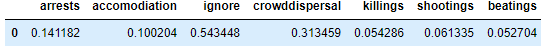

- Our approach to account for these imbalances and predict state responses can be broken down into a couple of models. 
    1. One model is going to predict when a state ignores a protest.
    2. The other model is going to predict the rest of the state responses using the data without instances when the state
    response is not ignore. 


In [134]:

frequencies = {
    'arrests':[mass_no_country['arrests'].value_counts(normalize=True)[1]],
    'accomodation' : [mass_no_country['accomodation'].value_counts(normalize=True)[1]],
    'ignore' : [mass_no_country['ignore'].value_counts(normalize=True)[1]],
    'crowddispersal' : [mass_no_country['crowddispersal'].value_counts(normalize=True)[1]], 
    'killings' : [mass_no_country['killings'].value_counts(normalize=True)[1]], 
    'shootings' : [mass_no_country['shootings'].value_counts(normalize=True)[1]], 
    'beatings' : [mass_no_country['beatings'].value_counts(normalize=True)[1]]
}

pd.DataFrame(frequencies)

,arrests,accomodation,ignore,crowddispersal,killings,shootings,beatings
0,0.141182,0.100204,0.543448,0.313459,0.054286,0.061335,0.052704


### Logistic Regression for when the State ignores protests 

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_we

[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   5.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total tim

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   3.7s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s


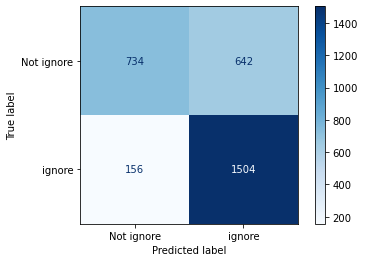

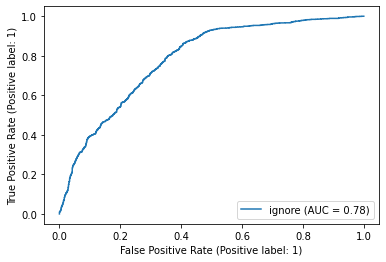

In [156]:
ignore_results = {
    'target' : [],
    'best_cv_scores' : [],
    'AUC_train_score' : [],
    'AUC_test_score' : [],
    'specificity' : [],
    'precision' : [], 
    'recall' : []
}

grids = []

targets = ['ignore']  
    
features = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
       'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
       'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'])

for target in targets: 

    X = features
    y = mass_no_country[target]

    logreg = LogisticRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    params = {
    'penalty' : ['l1','l2'], 
    'C' : [.01],
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100, 1000],
    'class_weight' : [{1:0, 1:3.3}, {1:0, 1:5}, {1:0, 1:1}, {1:0,1:8.33}]
    }

    grid = GridSearchCV(
        logreg, param_grid=params, cv=10, verbose=2, 
        scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
        refit='AUC', 
        return_train_score=True
    )
    
    # fit grids
    grid.fit(X_train_sc, y_train)
    grids.append(grid)
    
    # append targets
    ignore_results['target'].append(target)

    # append important grid results
    ignore_results['best_cv_scores'].append(grid.best_score_)

    # make predictions 
    train_preds = grid.predict(X_train_sc)
    test_preds = grid.predict(X_test_sc)
    
    # plot confusion matrix 
    plot_confusion_matrix(grid, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}', f'{target}'])
    tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()
    specificity = tn / (tn+fp)
    
    # ROC/AUC 
    plot_roc_curve(grid, X_test_sc, y_test, name=target)

    # various classification metrics
    # AUC scores 
    ignore_results['AUC_train_score'].append(roc_auc_score(y_train, train_preds))
    ignore_results['AUC_test_score'].append(roc_auc_score(y_test, test_preds))

    # precision scores 
    ignore_results['precision'].append(precision_score(y_train, train_preds))
    
    # specifity scores 
    ignore_results['specificity'].append(specificity)

    # recall scores
    ignore_results['recall'].append(recall_score(y_train, train_preds))


In [157]:
ignore_results_df = pd.DataFrame(ignore_results)
ignore_results_df

,target,best_cv_scores,AUC_train_score,AUC_test_score,specificity,precision,recall
0,ignore,0.787455,0.720819,0.719727,0.53343,0.70082,0.894825


## Coefficients from Ignore LogisticRegression

In [137]:
y = []
for i in grids:
    x = (i.best_params_)
    y.append(x)
best_params = pd.DataFrame(y)
best_params

,C,class_weight,max_iter,penalty,solver
0,0.01,{1: 1},1000,l2,saga


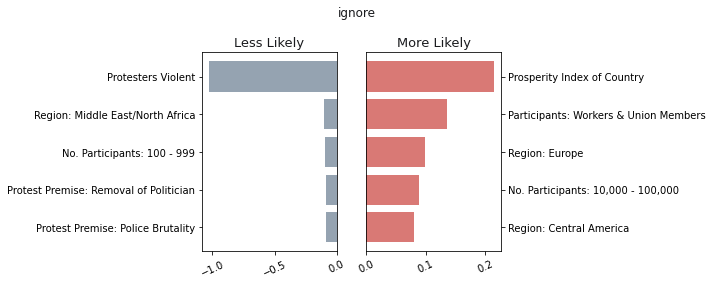

In [138]:
targets = ['ignore']  

features = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
   'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
   'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
   'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'])

count=0
for target in targets: 
    X = features
    y = mass_no_country[target]
    
    lr = LogisticRegression(C=best_params['C'][count], 
                           class_weight=best_params['class_weight'][count], 
                           max_iter=best_params['max_iter'][count], 
                           penalty=best_params['penalty'][count], 
                           solver=best_params['solver'][count]
                           )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lr.fit(X_train_sc, y_train)

    negative_features, negative_coeffs, positive_features, positive_coeffs = find_most_important_features(X_train, lr, n=5)

    # plot coefficients 
    plot_most_important_features(negative_features, negative_coeffs, positive_features, positive_coeffs, f'{target}')
    count += 1

## Logistic Regression without ignore

Now that we have a model that predicts when the government does respond, we want to predict when the government does not ignore protests.

In [139]:
# create df without ignore 
gov_response = mass_no_country[mass_no_country['ignore'] == 0]
gov_response.head(2)

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration,violent_response
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711,57,0
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267,2,0


In [140]:
# look at imbalances of gov_responses df 
gov_response_frequencies = {
    'arrests':[gov_response['arrests'].value_counts(normalize=True)[1]],
    'accomodation' : [gov_response['accomodation'].value_counts(normalize=True)[1]],
    'crowddispersal' : [gov_response['crowddispersal'].value_counts(normalize=True)[1]], 
    'killings' : [gov_response['killings'].value_counts(normalize=True)[1]], 
    'shootings' : [gov_response['shootings'].value_counts(normalize=True)[1]], 
    'beatings' : [gov_response['beatings'].value_counts(normalize=True)[1]]
}

pd.DataFrame(gov_response_frequencies)

,arrests,accomodation,crowddispersal,killings,shootings,beatings
0,0.301154,0.192208,0.67013,0.116162,0.131313,0.111977


- classes are still heavily imbalanced. crowddispersal is over 60% of the data, and killings, shootings, and beatings make up a really small portion of the data. 
- let's run a logistic regression on when the government response is a crowddispersal. 

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, ma

[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] 

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; tota

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penal

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_we

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; tota

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   

[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1,

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, pena

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total tim

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] 

[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, so

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1,

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.2s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, so

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s
Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01

[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, ma

[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight=

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, so

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1,

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, pena

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; tota

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C

[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=libli

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, pena

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


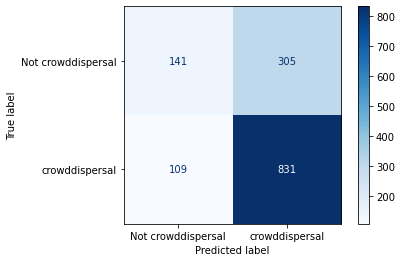

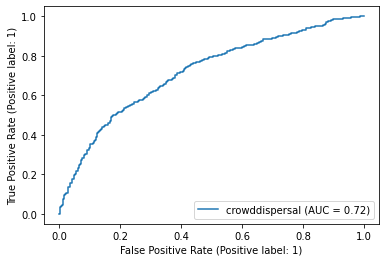

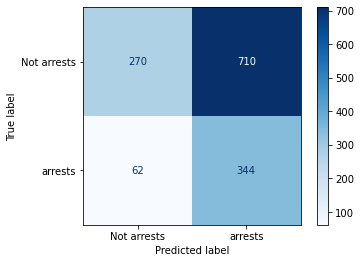

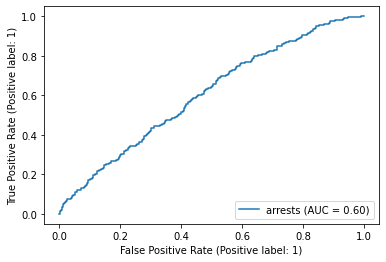

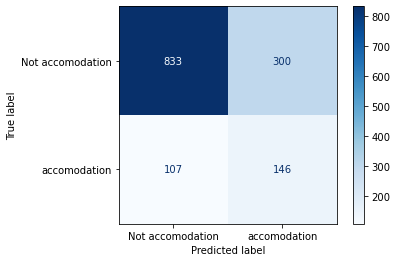

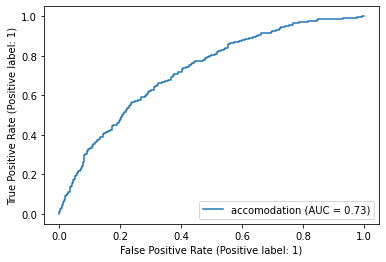

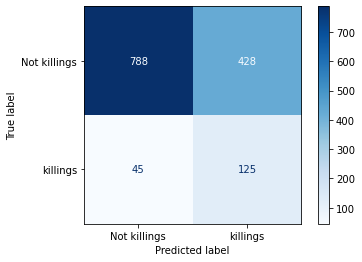

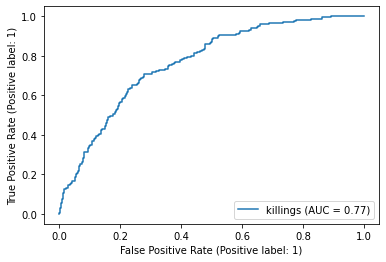

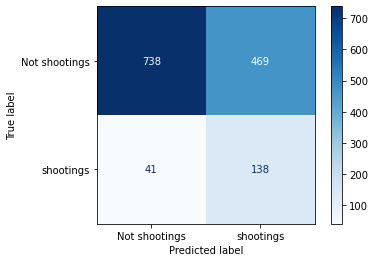

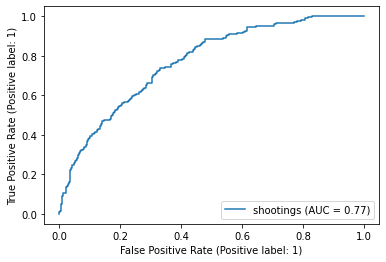

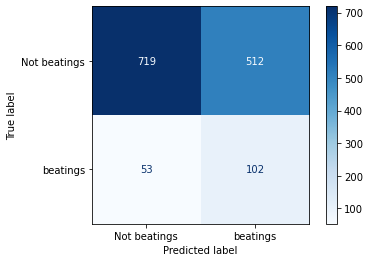

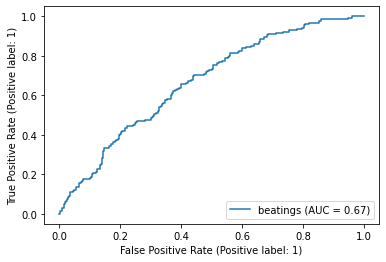

In [160]:
results = {
    'target' : [],
    'best_cv_scores' : [],
    'AUC_train_score' : [],
    'AUC_test_score' : [],
    'specificity' : [],
    'precision' : [], 
    'recall' : []
}

grids = []

targets = ['crowddispersal', 'arrests', 'accomodation', 'killings', 'shootings', 'beatings']  
    
features = gov_response.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
       'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
       'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'])

for target in targets: 

    X = features
    y = gov_response[target]

    logreg = LogisticRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    params = {
    'penalty' : ['l1','l2'], 
    'C' : [.01],
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100, 1000],
    'class_weight' : [{1:0, 1:3.3}, {1:0, 1:5}, {1:0, 1:1}, {1:0,1:8.33}]
    }

    grid = GridSearchCV(
        logreg, param_grid=params, cv=10, verbose=2, 
        scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
        refit='AUC', 
        return_train_score=True
    )
    
    # fit grids
    grid.fit(X_train_sc, y_train)
    grids.append(grid)
    
    # append targets
    results['target'].append(target)

    # append important grid results
    results['best_cv_scores'].append(grid.best_score_)

    # make predictions 
    train_preds = grid.predict(X_train_sc)
    test_preds = grid.predict(X_test_sc)
    
    # plot confusion matrix 
    plot_confusion_matrix(grid, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}', f'{target}'])
    tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()
    specificity = tn / (tn+fp)
    
    # ROC/AUC 
    plot_roc_curve(grid, X_test_sc, y_test, name=target)

    # various classification metrics
    # AUC scores 
    results['AUC_train_score'].append(roc_auc_score(y_train, train_preds))
    results['AUC_test_score'].append(roc_auc_score(y_test, test_preds))

    # precision scores 
    results['precision'].append(precision_score(y_train, train_preds))
    
    # specifity scores 
    results['specificity'].append(specificity)

    # recall scores
    results['recall'].append(recall_score(y_train, train_preds))


In [161]:
results_df = pd.DataFrame(results)
results_df

,target,best_cv_scores,AUC_train_score,AUC_test_score,specificity,precision,recall
0,crowddispersal,0.726762,0.610382,0.600093,0.316143,0.727352,0.899568
1,arrests,0.619219,0.571390,0.561400,0.275510,0.342803,0.861392
2,accomodation,0.725600,0.667702,0.656146,0.735216,0.363689,0.581094
3,killings,0.779378,0.720181,0.691660,0.648026,0.224291,0.796850
4,shootings,0.793112,0.725188,0.691192,0.611433,0.246685,0.839945
5,beatings,0.683480,0.655121,0.621071,0.584078,0.180472,0.726248


In [163]:
scores = pd.concat([ignore_results_df,results_df])
scores

,target,best_cv_scores,AUC_train_score,AUC_test_score,specificity,precision,recall
0,ignore,0.787455,0.720819,0.719727,0.533430,0.700820,0.894825
0,crowddispersal,0.726762,0.610382,0.600093,0.316143,0.727352,0.899568
1,arrests,0.619219,0.571390,0.561400,0.275510,0.342803,0.861392
2,accomodation,0.725600,0.667702,0.656146,0.735216,0.363689,0.581094
3,killings,0.779378,0.720181,0.691660,0.648026,0.224291,0.796850
4,shootings,0.793112,0.725188,0.691192,0.611433,0.246685,0.839945
5,beatings,0.683480,0.655121,0.621071,0.584078,0.180472,0.726248


In [164]:
scores.to_csv('./data/scores.csv')

## Coefficients from Logistic Regression without ignore

In [144]:
y = []
for i in grids:
    x = (i.best_params_)
    y.append(x)
best_params = pd.DataFrame(y)
best_params

,C,class_weight,max_iter,penalty,solver
0,0.01,{1: 1},100,l2,saga
1,0.01,{1: 3.3},100,l2,liblinear
2,0.01,{1: 3.3},100,l2,liblinear
3,0.01,{1: 8.33},100,l2,liblinear
4,0.01,{1: 8.33},100,l1,liblinear
5,0.01,{1: 8.33},1000,l2,saga


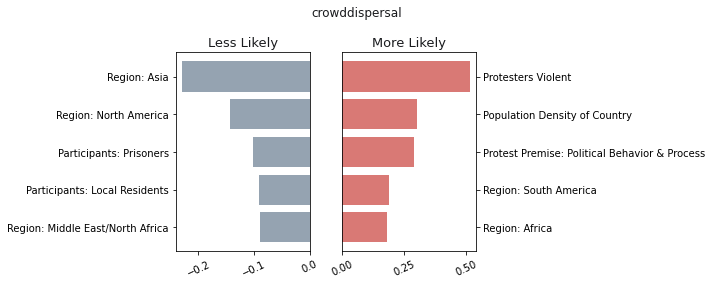

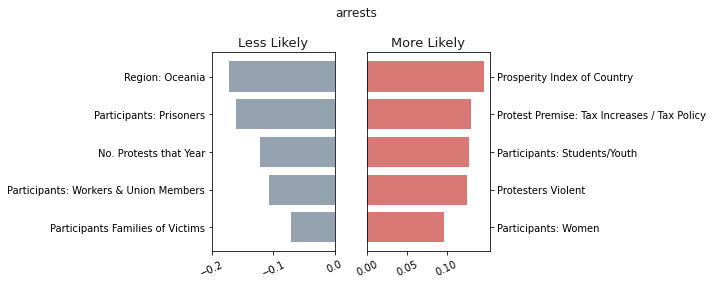

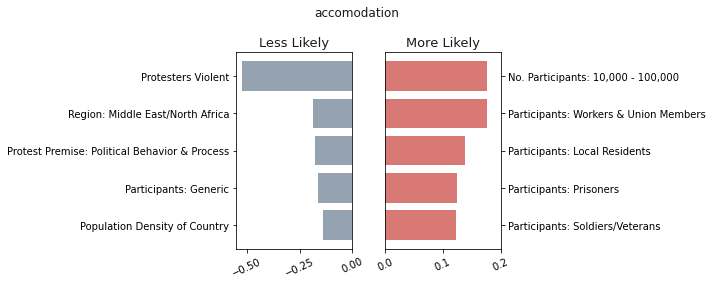

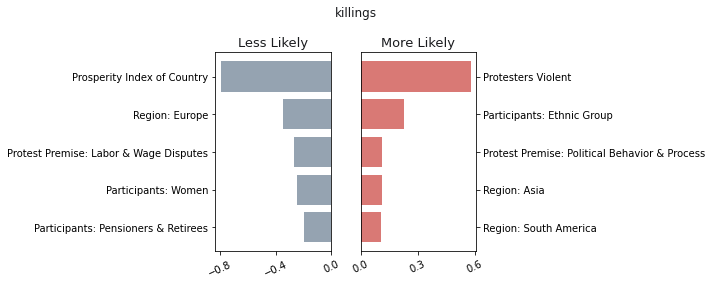

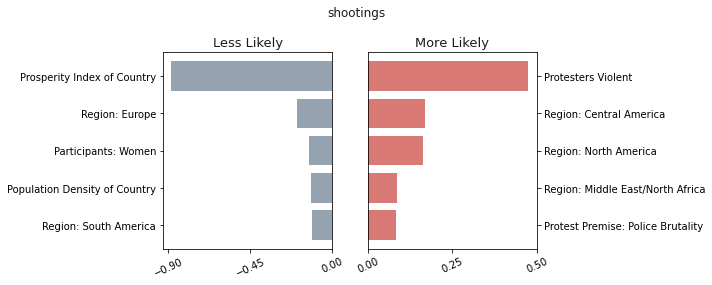

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


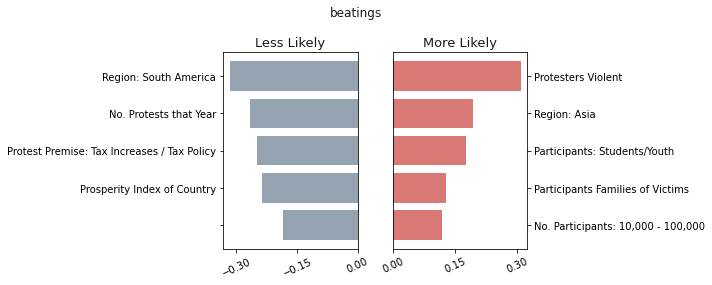

In [146]:
# targets equal to the targets in model
targets = ['crowddispersal', 'arrests', 'accomodation', 'killings', 'shootings', 'beatings']  

features = gov_response.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
   'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
   'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
   'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'])

count=0
for target in targets: 
    X = features
    y = gov_response[target]
    
    lr = LogisticRegression(C=best_params['C'][count], 
                           class_weight=best_params['class_weight'][count], 
                           max_iter=best_params['max_iter'][count], 
                           penalty=best_params['penalty'][count], 
                           solver=best_params['solver'][count]
                           )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lr.fit(X_train_sc, y_train)

    negative_features, negative_coeffs, positive_features, positive_coeffs = find_most_important_features(X_train, lr, n=5)

    # plot coefficients 
    plot_most_important_features(negative_features, negative_coeffs, positive_features, positive_coeffs, f'{target}')
    count += 1

## Logistic Regression grouping violent responses 

In [147]:
# look at imbalances of gov_responses df 
gov_response_frequencies = {
    'arrests':[gov_response['arrests'].value_counts(normalize=True)[1]],
    'accomodation' : [gov_response['accomodation'].value_counts(normalize=True)[1]],
    'crowddispersal' : [gov_response['crowddispersal'].value_counts(normalize=True)[1]],
    'violent_response' : [gov_response['violent_response'].value_counts(normalize=True)[1]],
}

pd.DataFrame(gov_response_frequencies)

,arrests,accomodation,crowddispersal,violent_response
0,0.301154,0.192208,0.67013,0.265801


- as we can see, by dropping crowddispersal and ignore from our data, our data is much more balanced. 
- let's run a model on each of these variables.

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l2, solver=liblinear; total time=   

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=1000, penalty=l2, solver=liblinear; tota

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01,

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.2s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.2s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   

[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, so

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1,

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.3s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, pena

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] 

[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l2, solver=saga; total time=   

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penal

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, so

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight=

[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; tota

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penal

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3.3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_we

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total tim

[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=liblinear; tota

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s


C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.01, class_weight={1: 8.33}, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


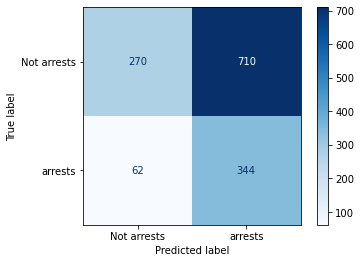

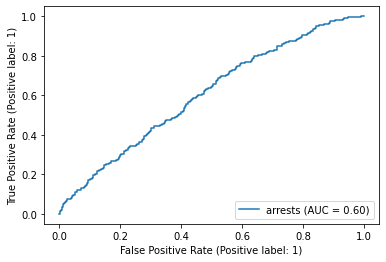

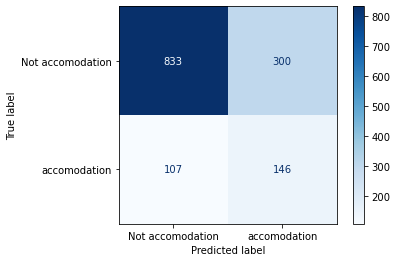

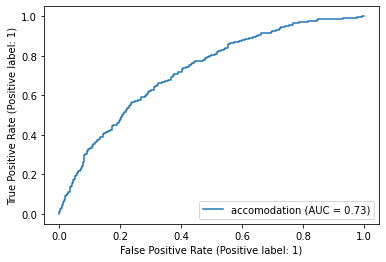

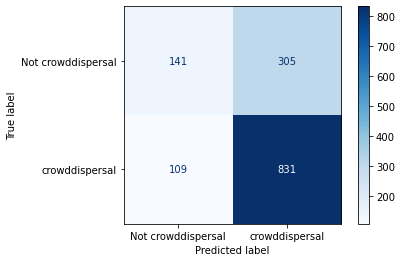

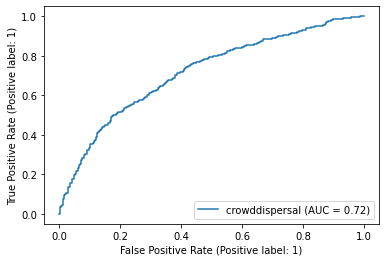

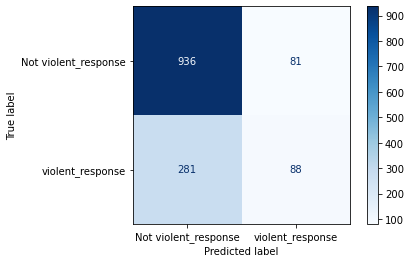

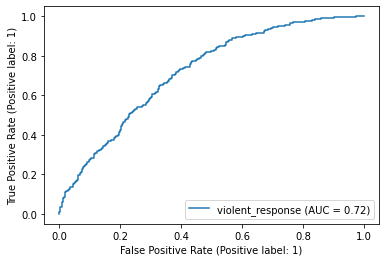

In [148]:
results = {
    'target' : [],
    'best_cv_scores' : [],
    'AUC_train_score' : [],
    'AUC_test_score' : [],
    'specificity' : [],
    'precision' : [], 
    'recall' : []
}

grids = []

targets = ['arrests', 'accomodation', 'crowddispersal', 'violent_response']  
    
features = gov_response.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
       'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
       'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'])

for target in targets: 

    X = features
    y = gov_response[target]

    logreg = LogisticRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    params = {
    'penalty' : ['l1','l2'], 
    'C' : [.01],
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100, 1000],
    'class_weight' : [{1:0, 1:3.3}, {1:0, 1:5}, {1:0, 1:1}, {1:0,1:8.33}]
    }

    grid = GridSearchCV(
        logreg, param_grid=params, cv=10, verbose=2, 
        scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
        refit='AUC', 
        return_train_score=True
    )
    
    # fit grids
    grid.fit(X_train_sc, y_train)
    grids.append(grid)
    
    # append targets
    results['target'].append(target)

    # append important grid results
    results['best_cv_scores'].append(grid.best_score_)

    # make predictions 
    train_preds = grid.predict(X_train_sc)
    test_preds = grid.predict(X_test_sc)
    
    # plot confusion matrix 
    plot_confusion_matrix(grid, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}', f'{target}'])
    tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()
    specificity = tn / (tn+fp)
    
    # ROC/AUC 
    plot_roc_curve(grid, X_test_sc, y_test, name=target)

    # various classification metrics
    # AUC scores 
    results['AUC_train_score'].append(roc_auc_score(y_train, train_preds))
    results['AUC_test_score'].append(roc_auc_score(y_test, test_preds))

    # precision scores 
    results['precision'].append(precision_score(y_train, train_preds))
    
    # specifity scores 
    results['specificity'].append(specificity)

    # recall scores
    results['recall'].append(recall_score(y_train, train_preds))

In [149]:
results_df = pd.DataFrame(results)
results_df

,target,best_cv_scores,AUC_train_score,AUC_test_score,specificity,precision,recall
0,arrests,0.619219,0.571390,0.561400,0.275510,0.342803,0.861392
1,accomodation,0.725600,0.667702,0.656146,0.735216,0.363689,0.581094
2,crowddispersal,0.726767,0.610382,0.600093,0.316143,0.727352,0.899568
3,violent_response,0.738434,0.587196,0.579418,0.920354,0.558140,0.244399


## Coefficients from 'arrests', 'accomodation', 'killings', 'shootings', and 'beatings' Logistic Regressions

In [150]:
y = []
for i in grids:
    x = (i.best_params_)
    y.append(x)
best_params = pd.DataFrame(y)
best_params

,C,class_weight,max_iter,penalty,solver
0,0.01,{1: 3.3},100,l2,liblinear
1,0.01,{1: 3.3},100,l2,liblinear
2,0.01,{1: 1},1000,l2,saga
3,0.01,{1: 1},100,l2,liblinear


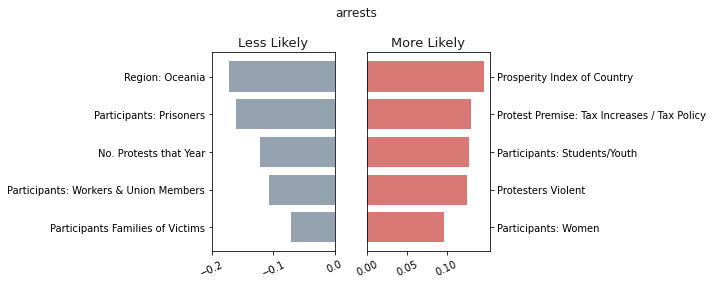

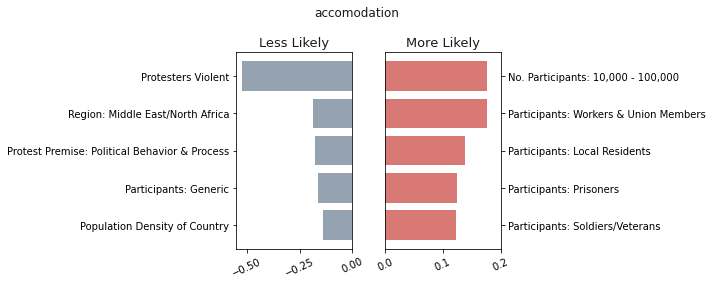

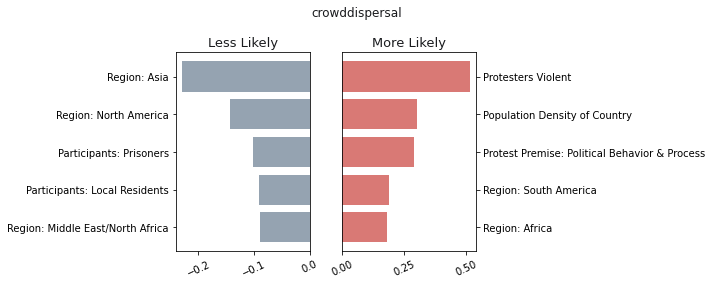

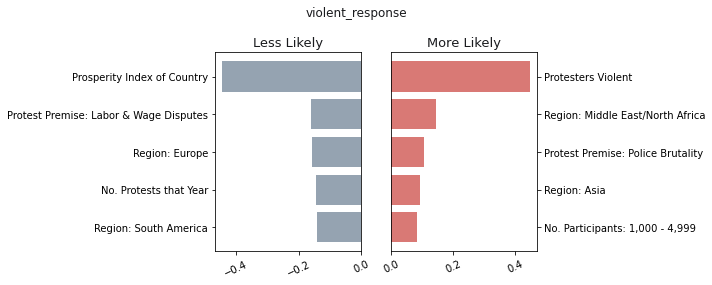

In [153]:
targets = ['arrests', 'accomodation', 'crowddispersal', 'violent_response']  

features = gov_response.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
   'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
   'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
   'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response'])

count=0
for target in targets: 
    X = features
    y = gov_response[target]
    
    lr = LogisticRegression(C=best_params['C'][count], 
                           class_weight=best_params['class_weight'][count], 
                           max_iter=best_params['max_iter'][count], 
                           penalty=best_params['penalty'][count], 
                           solver=best_params['solver'][count]
                           )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lr.fit(X_train_sc, y_train)

    negative_features, negative_coeffs, positive_features, positive_coeffs = find_most_important_features(X_train, lr, n=5)

    # plot coefficients 
    plot_most_important_features(negative_features, negative_coeffs, positive_features, positive_coeffs, f'{target}')
    count += 1